In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import poisson, norm, chisquare

Here we are figuring out our operating voltage.  Notice the count starts to blow up around 950.

Our operating voltage is 780

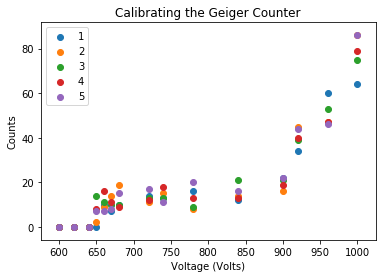

In [2]:
df = pd.read_excel('geiger_calibration.xlsx')
X = df.values
for i in range(1, len(X[0])):
    plt.scatter(X[:, 0], X[:,i])
    
plt.title('Calibrating the Geiger Counter')
plt.ylabel('Counts')
plt.xlabel('Voltage (Volts)')
plt.legend([1,2,3,4,5])
plt.show()

2.25 2.6141666666666667 0.08660254037844387 0.16228922528048642 0.18395051683031627
14.448196394392925 8 16 4.0


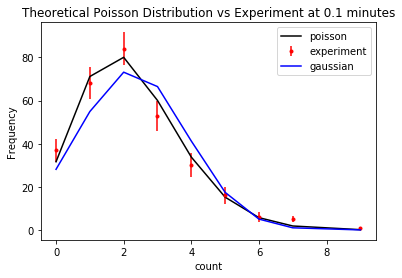

In [3]:
# load data and format for analysis
df1 = pd.read_excel('0.1min_interval_geiger.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Theoretical Poisson Distribution vs Experiment at 0.1 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

23.383333333333333 20.83638888888889 0.6242773600109347 4.25894317722335 4.304453415828721
22.09163381909985 18 36 6.0


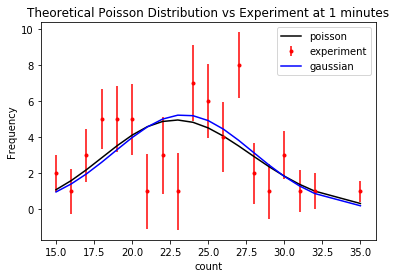

In [4]:
# load data and format for analysis
df1 = pd.read_excel('1min_interval_geiger.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Theoretical Poisson Distribution vs Experiment at 1 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

237.83333333333334 147.80555555555557 6.295942255841368 150.26081029700032 150.39265274607004
60.684307651655175 4 8 2.8284271247461903


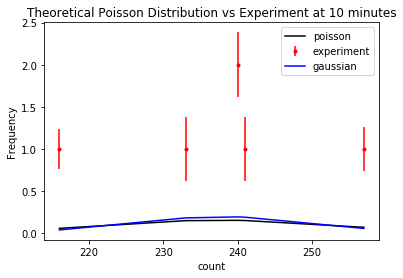

In [5]:
# load data and format for analysis
df1 = pd.read_excel('10min_interval_geiger.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Theoretical Poisson Distribution vs Experiment at 10 minutes')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()

1.2967741935483872 1.0732154006243495 0.06467721824439814 0.08177782721776573 0.10426291567135582
6.062625409177406 5 10 3.1622776601683795


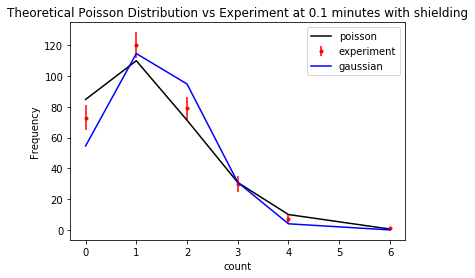

In [6]:
# load data and format for analysis
df1 = pd.read_excel('0.1min_interval_geiger_shield.xlsx', header=None)
counts = df1.values
counts = np.ndarray.flatten(counts)
x, y = np.unique(counts, return_counts=True)

# get sample mean, sample variance, bin variance, and chi squared statistic
mean = np.mean(counts)
std = np.std(counts)
mean_uncertainty = np.sqrt(mean/sum(y))
varovar = 2*mean**2-mean
uncertainty_of_var = np.sqrt(varovar)/np.sqrt(sum(y)-1)
print(mean, std**2, mean_uncertainty, uncertainty_of_var, np.sqrt(mean_uncertainty**2 + uncertainty_of_var**2))
yvar = []
for i, exp in enumerate(y):
    yvar.append(sum(y)*poisson.pmf(x[i], mean)*(1-poisson.pmf(x[i], mean)))
    
expected_values = sum(y)*poisson.pmf(x, mean)
chi2_arr = []
for i, exp in enumerate(y):
    numer = exp-expected_values[i]
    if exp == 0:
        continue
    denom = np.sqrt(yvar[i])
    chi2_arr.append((numer/denom)**2)
print(sum(chi2_arr), len(x)-1, 2*(len(x)-1), np.sqrt(2*(len(x)-1))) # experimental chi2, theoretical chi2 for poisson, theoretical variance

# plot
plt.errorbar(x, sum(y)*poisson.pmf(x, mean), fmt='-k')
plt.errorbar(x, y, yerr=np.sqrt(yvar), fmt='.r') # binomial std for error bars
plt.errorbar(x, sum(y)*np.exp(-(x-mean)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) ,fmt='-b')
plt.title('Theoretical Poisson Distribution vs Experiment at 0.1 minutes with shielding')
plt.ylabel('Frequency')
plt.xlabel('count')
plt.legend(['poisson', 'experiment', 'gaussian'])
plt.show()